## Churn Analysis and Prediction

### Import Basic Libraries

In [498]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import joblib

### Import the Data

In [500]:
file_path = "Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_Churndata'
# Read the data from the specified sheet into a pandas DataFrame
dataset = pd.read_excel(file_path,sheet_name = 'vw_Churndata')


### First 5 Rows of dataset

In [502]:
dataset.head(5)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


### Data Preprocessing

### Drop columns which are not used for prediction

In [505]:
dataset = dataset.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

### dataset Information

In [507]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6007 non-null   object 
 1   Age                          6007 non-null   int64  
 2   Married                      6007 non-null   object 
 3   State                        6007 non-null   object 
 4   Number_of_Referrals          6007 non-null   int64  
 5   Tenure_in_Months             6007 non-null   int64  
 6   Value_Deal                   2710 non-null   object 
 7   Phone_Service                6007 non-null   object 
 8   Multiple_Lines               6007 non-null   object 
 9   Internet_Service             6007 non-null   object 
 10  Internet_Type                4784 non-null   object 
 11  Online_Security              6007 non-null   object 
 12  Online_Backup                6007 non-null   object 
 13  Device_Protection_

### List of columns to be label encoded

In [509]:
columns_to_encode = ['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
                     'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
                    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
                     'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
                    'Payment_Method']

 

### Encode categorical variables except the target variable

In [511]:
label_encoders={}
for column in columns_to_encode :
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

### Manually encode the target variable 'Customer_Status'

In [513]:
print(dataset['Customer_Status'].unique())

['Stayed' 'Churned']


In [514]:
dataset['Customer_Status'] = dataset['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [515]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6007 non-null   int32  
 1   Age                          6007 non-null   int64  
 2   Married                      6007 non-null   int32  
 3   State                        6007 non-null   int32  
 4   Number_of_Referrals          6007 non-null   int64  
 5   Tenure_in_Months             6007 non-null   int64  
 6   Value_Deal                   6007 non-null   int32  
 7   Phone_Service                6007 non-null   int32  
 8   Multiple_Lines               6007 non-null   int32  
 9   Internet_Service             6007 non-null   int32  
 10  Internet_Type                6007 non-null   int32  
 11  Online_Security              6007 non-null   int32  
 12  Online_Backup                6007 non-null   int32  
 13  Device_Protection_

### Split data into features and target

In [517]:
# Split data into features and target
X = dataset.drop('Customer_Status', axis=1)
y = dataset['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### Train Random Forest Model

In [519]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=52)

#Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=52)

### Make predictions on Test Data

In [521]:
y_pred = rf_model.predict(X_test)

### Evaluate the model

In [523]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[787  52]
 [147 216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       839
           1       0.81      0.60      0.68       363

    accuracy                           0.83      1202
   macro avg       0.82      0.77      0.79      1202
weighted avg       0.83      0.83      0.83      1202



### Feature Importance

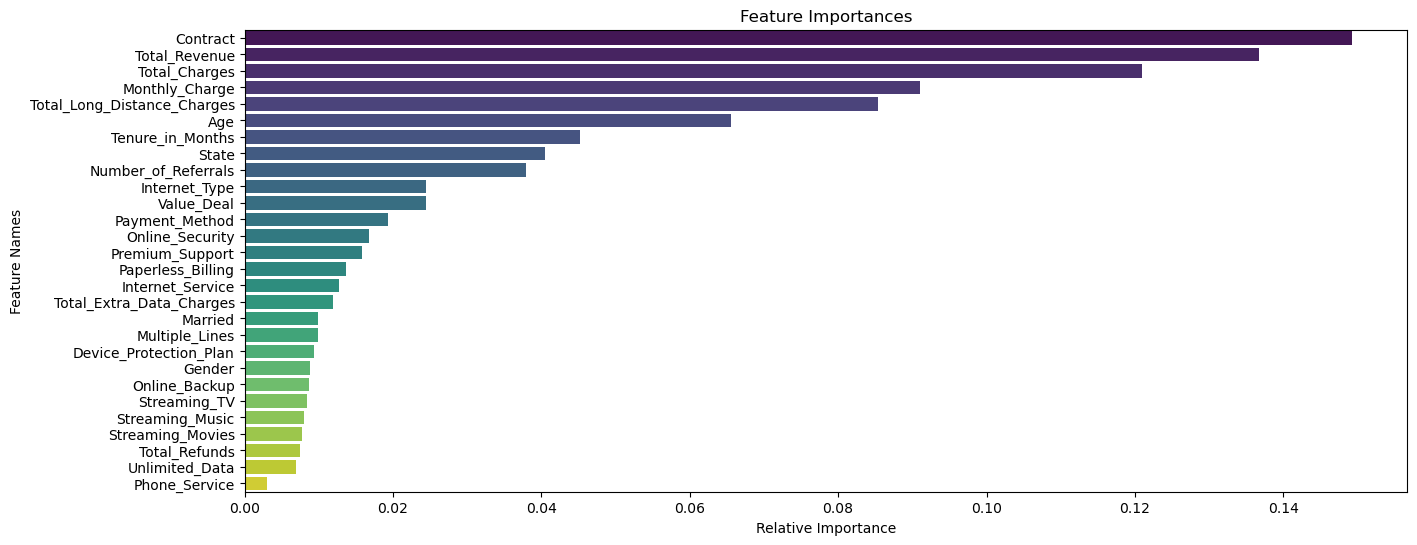

In [525]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices],palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

### Use Model for Prediction on New Data

In [561]:
# Define the path to the Joiner Data Excel file
file_path = "Prediction_data.xlsx"

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name='vw_joinedData')

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()


# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']


# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])


# Make prediction
new_predictions = rf_model.predict(new_data)

 
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

 
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]
# Save the results

original_data.to_csv("Predictions.csv", index=False)